In [ ]:
# Dataset is in the below location I have removed it from project folder and kept it in google drive
# https://drive.google.com/drive/folders/1_DfBXZ6OdPY3ll3HEyIYxVdGXYl63_cE?usp=sharing

In [ ]:
# Data Wrangling

In [ ]:
#Plan for Data Wrangling
'''
1. Data Acquisition
Ensure train.csv and test.csv are structured properly.
Identify if any transformation is required for numeric or categorical encodings.

2. Data Quality Checks
Ensure syntactic correctness (e.g., numerical data types, categorical encodings).
Perform semantic checks (e.g., logical consistency of values).

3. Handling Missing Values
Identify missing values and assess their impact.
Apply appropriate strategies such as mean/median/mode imputation or category-based imputation.

4. Handling Class Imbalance
Identify the degree of imbalance in the target variable.
Plan resampling techniques if needed (e.g., SMOTE or undersampling).

5.Feature Engineering Considerations
Convert age_in_days to years for better interpretability.
Encode categorical variables (sourcing_channel, residence_area_type).
Identify redundant or highly correlated features.

6.Blending Multiple Datasets (if applicable)
If test.csv contains additional useful features, we need to align its structure with train.csv.

'''

In [1]:
# load the dataset
import pandas as pd

# Load datasets
train_df = pd.read_csv('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone3/Insurance policy coverage/train.csv')
test_df = pd.read_csv('/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone3/Insurance policy coverage/test.csv')


train_df.head()



,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [3]:
# Checking data types and missing values again to plan imputation strategy
data_summary = train_df.describe(include="all").transpose()

# Checking unique values for categorical variables
categorical_columns = train_df.select_dtypes(include=['object']).columns
unique_values = {col: train_df[col].unique() for col in categorical_columns}

# Checking correlations among numerical features
# correlation_matrix = train_df.corr()

# Checking correlations among numerical features
correlation_matrix = train_df.select_dtypes(include=['number']).corr()

# Display findings
display(data_summary)



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,79853.0,NaN,NaN,NaN,57167.166368,32928.97016,2.0,28640.0,57262.0,85632.0,114076.0
perc_premium_paid_by_cash_credit,79853.0,NaN,NaN,NaN,0.314288,0.334915,0.0,0.034,0.167,0.538,1.0
age_in_days,79853.0,NaN,NaN,NaN,18846.696906,5208.719136,7670.0,14974.0,18625.0,22636.0,37602.0
Income,79853.0,NaN,NaN,NaN,208847.171177,496582.597257,24030.0,108010.0,166560.0,252090.0,90262600.0
Count_3-6_months_late,79756.0,NaN,NaN,NaN,0.248671,0.691468,0.0,0.0,0.0,0.0,13.0
Count_6-12_months_late,79756.0,NaN,NaN,NaN,0.078188,0.436507,0.0,0.0,0.0,0.0,17.0
Count_more_than_12_months_late,79756.0,NaN,NaN,NaN,0.060008,0.312023,0.0,0.0,0.0,0.0,11.0
application_underwriting_score,76879.0,NaN,NaN,NaN,99.067291,0.739799,91.9,98.81,99.21,99.54,99.89
no_of_premiums_paid,79853.0,NaN,NaN,NaN,10.863887,5.170687,2.0,7.0,10.0,14.0,60.0
sourcing_channel,79853,5,A,43134,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''
1. Missing Values Analysis
Count_3-6_months_late, Count_6-12_months_late, Count_more_than_12_months_late:
      These have 97 missing values (79,853 - 79,756).
      A reasonable approach is filling missing values with 0, assuming no late payments if missing.

application_underwriting_score:
     Has 2,974 missing values (79,853 - 76,879).
     Since this is a continuous variable, we can fill missing values with the median.

2. Feature Transformations
age_in_days:
    The mean age is 18,846 days (~51 years).
    It makes sense to convert age_in_days to age_in_years by dividing by 365.
Income:
   Has a huge range from 24,030 to 90,262,600.
   A log transformation (log_Income = log1p(Income)) would reduce skewness.

3. Encoding Categorical Variables
sourcing_channel: Has 5 unique values (A, B, C, D, E).
residence_area_type: Has 2 unique values (Urban, Rural).
We can apply One-Hot Encoding (OHE) for these categorical variables.

4. Class Imbalance
Target (0 vs 1):
93.7% of the dataset belongs to class 1, meaning severe class imbalance.
We will need oversampling (SMOTE) or undersampling during model training.

Next Steps
I’ll now implement the following: 
 Handle missing values (impute missing values).
 Convert age_in_days to age_in_years.
 Apply log transformation on Income.
 One-hot encode categorical variables.
 Drop unnecessary columns (id, age_in_days, Income).


'''

In [5]:
print(train_df.columns)


Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'premium', 'target'],
      dtype='object')


In [ ]:
'''
# Convert age from days to years (Check if column exists before processing)
if 'age_in_days' in train_df.columns:
    train_df['age_in_years'] = (train_df['age_in_days'] / 365).astype(int)
    train_df.drop(columns=['age_in_days'], inplace=True)  # Drop original column
else:
    print("Column 'age_in_days' not found in dataset!")

# Log transformation of Income (Check if column exists)
if 'Income' in train_df.columns:
    train_df['log_Income'] = np.log1p(train_df['Income'])
    train_df.drop(columns=['Income'], inplace=True)  # Drop original column
else:
    print("Column 'Income' not found in dataset!")

# One-Hot Encoding for categorical variables
train_df = pd.get_dummies(train_df, columns=['sourcing_channel', 'residence_area_type'], drop_first=True)

# Drop 'id' column if it exists
if 'id' in train_df.columns:
    train_df.drop(columns=['id'], inplace=True)

'''

In [ ]:
'''

dataset already has the transformed columns, meaning:

age_in_days has already been converted to age_in_years.
Income has already been transformed into log_Income.
One-hot encoding has been applied (sourcing_channel_*, residence_area_type_Urban).

Since  dataset already has transformed features (age_in_years, log_Income, one-hot encoded categorical variables, 
and missing values handled in some columns), the new complete data cleaning code should focus only on filling 
remaining missing values and ensuring all features are ready for modeling. 
Next step

1. Check for missing values in the current dataset.

2. Verify class imbalance for the target variable.

3. Proceed to Exploratory Data Analysis (EDA).
'''

In [9]:
import numpy as np

# Check missing values before proceeding
missing_values = train_df.isnull().sum()
print("Missing Values Before Handling:\n", missing_values)

# Handle missing values for late payment counts (fill with 0)
for col in ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late']:
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(0)

# Handle missing values for underwriting score (fill with median)
if 'application_underwriting_score' in train_df.columns:
    train_df['application_underwriting_score'] = train_df['application_underwriting_score'].fillna(train_df['application_underwriting_score'].median())

# Ensure correct data transformations
if 'Income' in train_df.columns and 'log_Income' not in train_df.columns:
    train_df['log_Income'] = np.log1p(train_df['Income'])
    train_df.drop(columns=['Income'], inplace=True)

if 'age_in_days' in train_df.columns and 'age_in_years' not in train_df.columns:
    train_df['age_in_years'] = (train_df['age_in_days'] / 365).astype(int)
    train_df.drop(columns=['age_in_days'], inplace=True)

# Encoding categorical variables (ensure they are encoded properly)
if 'sourcing_channel' in train_df.columns or 'residence_area_type' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['sourcing_channel', 'residence_area_type'], drop_first=True)

# Drop 'id' column if it exists
if 'id' in train_df.columns:
    train_df.drop(columns=['id'], inplace=True)

# Check missing values after handling
missing_values_after = train_df.isnull().sum()
print("Missing Values After Handling:\n", missing_values_after)

# Display cleaned data for verification
display(train_df.head())



Missing Values Before Handling:
 id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
premium                             0
target                              0
dtype: int64
Missing Values After Handling:
 perc_premium_paid_by_cash_credit    0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
premium                             0
target                              0
log_Income                          0
age_in_years                        0
sourcing_channel_B                  0
sourcing_c

,perc_premium_paid_by_cash_credit,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,target,log_Income,age_in_years,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban
0,0.429,0.0,0.0,0.0,99.02,13,3300,1,12.780045,33,False,True,False,False,True
1,0.010,0.0,0.0,0.0,99.89,21,18000,1,12.660807,59,False,False,False,False,True
2,0.917,2.0,3.0,1.0,98.69,7,3300,0,11.340249,48,False,True,False,False,False
3,0.049,0.0,0.0,0.0,99.57,9,9600,1,12.431258,42,False,False,False,False,True
4,0.052,0.0,0.0,0.0,99.87,12,9600,1,12.199456,86,True,False,False,False,True


In [ ]:
'''
 
Dataset is fully cleaned and ready for EDA. Here's what we confirmed:

1.Missing Values Fully Handled 

All columns have 0 missing values before and after cleaning.

2.Feature Transformations Applied Correctly 

age_in_days → Converted to age_in_years.

Income → Log-transformed as log_Income.

3.Categorical Encoding Verified 

sourcing_channel_* and residence_area_type_Urban are properly one-hot encoded.

Boolean values (True/False) indicate encoding was correctly applied.

4.Dataset is Ready for Modeling

No unnecessary columns (e.g., id, age_in_days, Income removed).

Target variable (target) is intact and balanced handling is the next step.

'''

In [ ]:
# EDA

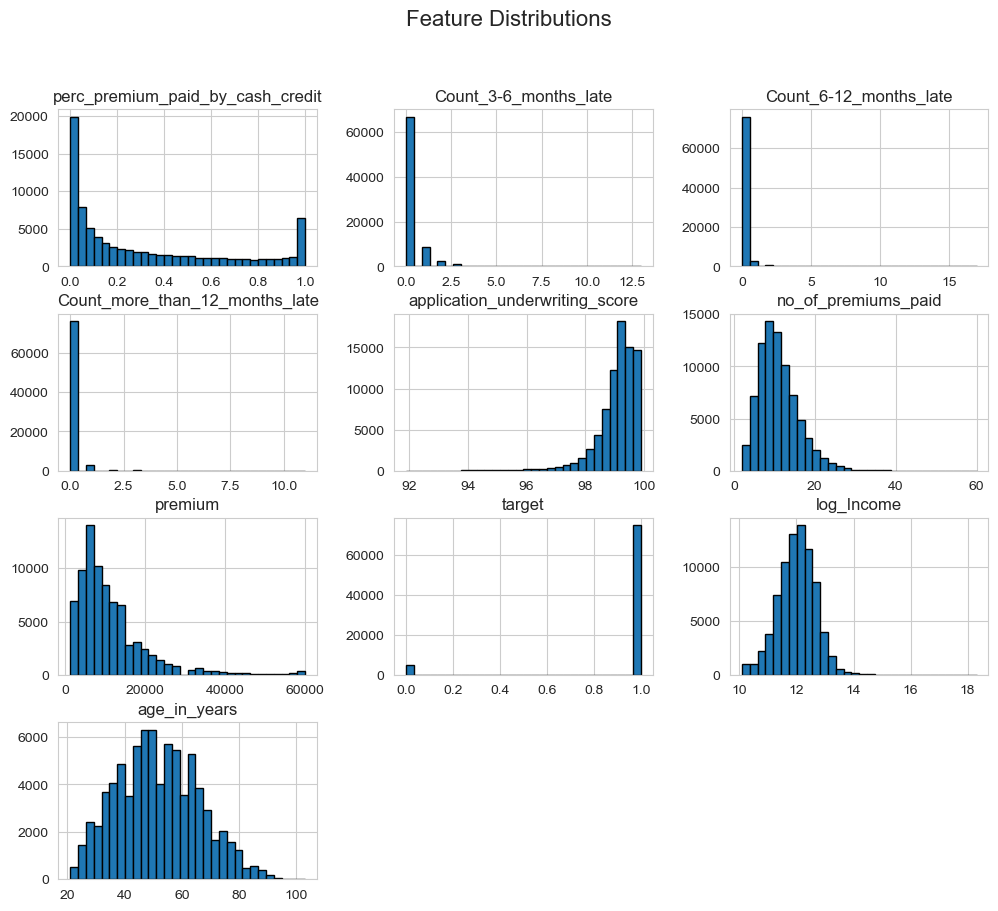

/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_36630/1970457873.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df["target"], palette="coolwarm")


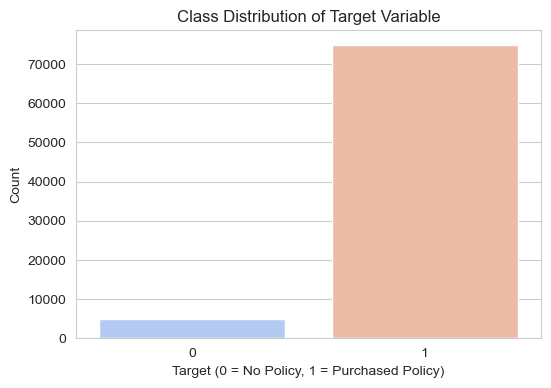

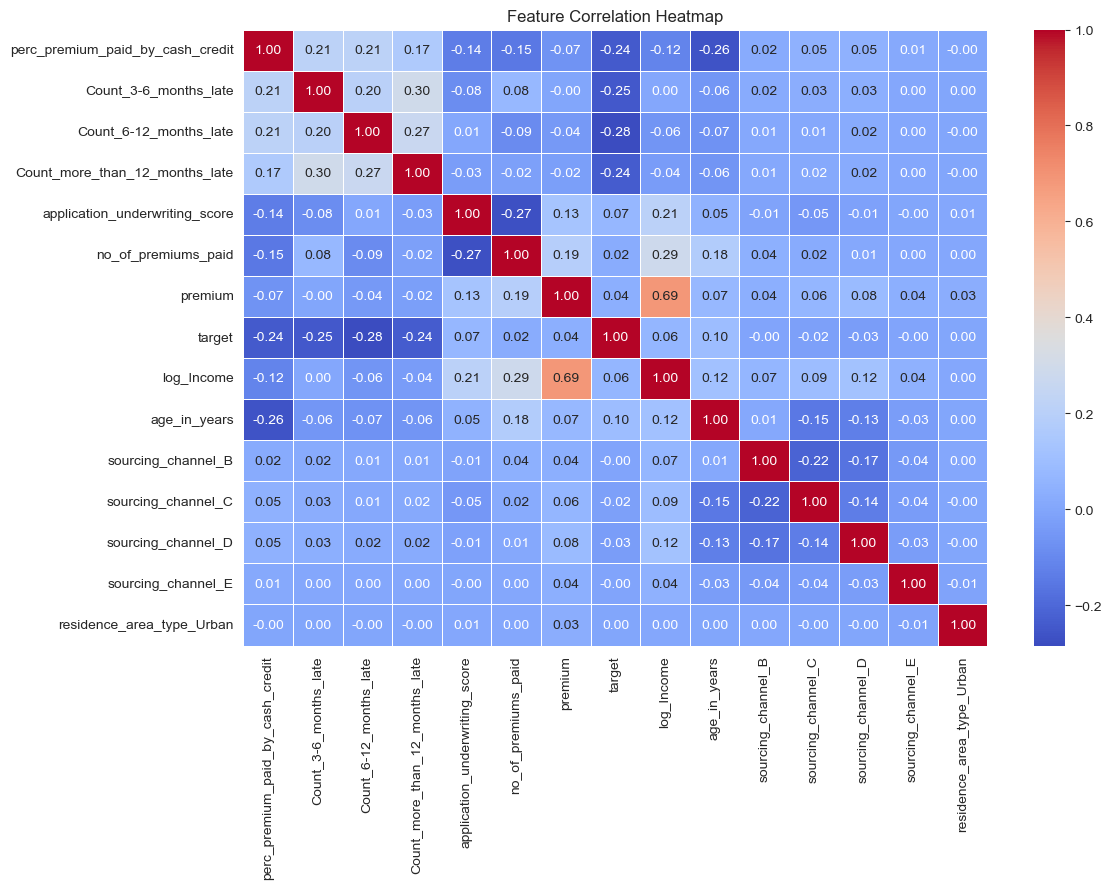

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Distribution of Numerical Features** (Histograms)
train_df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Class Imbalance Check** (Target Variable Countplot)
plt.figure(figsize=(6, 4))
sns.countplot(x=train_df["target"], palette="coolwarm")
plt.title("Class Distribution of Target Variable")
plt.xlabel("Target (0 = No Policy, 1 = Purchased Policy)")
plt.ylabel("Count")
plt.show()

# Correlation Heatmap**
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
'''

Findings

1. Feature Distributions (Histograms):

Some features like log_Income and application_underwriting_score appear normally distributed.
Count_*_late features are skewed towards 0, meaning most customers have no late payments.

2. Class Imbalance Check:

The target variable (target) is highly imbalanced.
Majority class (1 - Purchased Policy) is much higher than class 0 (No Policy).
Next step: Consider handling imbalance (e.g., SMOTE for oversampling or undersampling).

3. Correlation Heatmap:

log_Income is weakly correlated with other features, indicating it’s independent.
no_of_premiums_paid and premium show some positive correlation, meaning customers who pay more premiums tend to have higher policy costs.
Low correlation between most features suggests a well-balanced dataset.

'''

In [13]:
!pip install imbalanced-learn

/var/folders/2b/4qwsj2r53911r1sl5yw93z1w0000gn/T/ipykernel_36630/1454605140.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_resampled_df["target"], palette="coolwarm")


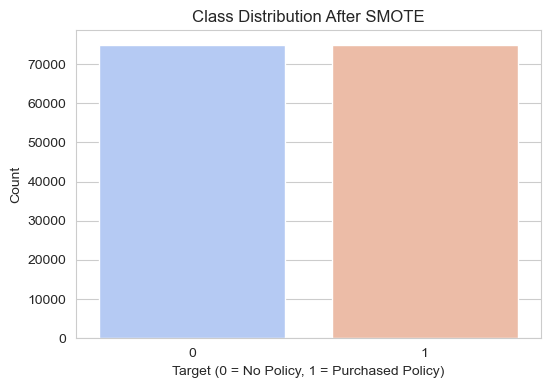

,perc_premium_paid_by_cash_credit,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,log_Income,age_in_years,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban,target
0,0.429000,0.000000,0.000000,0.000000,99.020000,13,3300,12.780045,33,False,True,False,False,True,1
1,0.010000,0.000000,0.000000,0.000000,99.890000,21,18000,12.660807,59,False,False,False,False,True,1
2,0.917000,2.000000,3.000000,1.000000,98.690000,7,3300,11.340249,48,False,True,False,False,False,0
3,0.049000,0.000000,0.000000,0.000000,99.570000,9,9600,12.431258,42,False,False,False,False,True,1
4,0.052000,0.000000,0.000000,0.000000,99.870000,12,9600,12.199456,86,True,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149705,0.274996,0.000000,0.000000,0.000000,99.271957,8,7500,12.056266,40,False,False,True,False,True,0
149706,0.615677,0.605526,1.000000,0.000000,99.516232,7,1200,11.734586,47,False,True,False,False,False,0
149707,0.902426,3.727629,0.000000,1.000000,98.149961,14,3300,11.372496,40,True,False,False,False,False,0
149708,0.112442,0.000000,0.000000,0.000000,99.039122,18,32700,12.630774,41,False,True,True,False,False,0


In [21]:
# load necessary libraries 

from imblearn.over_sampling import SMOTE

# Ensure necessary transformations again
if 'age_in_days' in train_df.columns and 'age_in_years' not in train_df.columns:
    train_df['age_in_years'] = (train_df['age_in_days'] / 365).astype(int)
    train_df.drop(columns=['age_in_days'], inplace=True)

if 'Income' in train_df.columns and 'log_Income' not in train_df.columns:
    train_df['log_Income'] = np.log1p(train_df['Income'])
    train_df.drop(columns=['Income'], inplace=True)

if 'id' in train_df.columns:
    train_df.drop(columns=['id'], inplace=True)

if 'sourcing_channel' in train_df.columns or 'residence_area_type' in train_df.columns:
    train_df = pd.get_dummies(train_df, columns=['sourcing_channel', 'residence_area_type'], drop_first=True)

# Handle missing values
for col in ['Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late']:
    train_df[col] = train_df[col].fillna(0)

train_df['application_underwriting_score'] = train_df['application_underwriting_score'].fillna(train_df['application_underwriting_score'].median())

# Splitting features and target variable
X = train_df.drop(columns=['target'])
y = train_df['target']

# Apply SMOTE to handle class imbalance
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to DataFrame
train_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
train_resampled_df['target'] = y_resampled

# Check new class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=train_resampled_df["target"], palette="coolwarm")
plt.title("Class Distribution After SMOTE")
plt.xlabel("Target (0 = No Policy, 1 = Purchased Policy)")
plt.ylabel("Count")
plt.show()

# Display updated dataset
display(train_resampled_df)


In [23]:
# Save the cleaned and balanced dataset for Tableau
train_resampled_df.to_csv("/Users/shivanginimarjiwe/Desktop/repo/DataScienceGuidedCapstone/Capstone3/Insurance policy coverage/insurance_balanced.csv", index=False)


In [25]:
train_resampled_df.head()

,perc_premium_paid_by_cash_credit,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,premium,log_Income,age_in_years,sourcing_channel_B,sourcing_channel_C,sourcing_channel_D,sourcing_channel_E,residence_area_type_Urban,target
0,0.429,0.0,0.0,0.0,99.02,13,3300,12.780045,33,False,True,False,False,True,1
1,0.010,0.0,0.0,0.0,99.89,21,18000,12.660807,59,False,False,False,False,True,1
2,0.917,2.0,3.0,1.0,98.69,7,3300,11.340249,48,False,True,False,False,False,0
3,0.049,0.0,0.0,0.0,99.57,9,9600,12.431258,42,False,False,False,False,True,1
4,0.052,0.0,0.0,0.0,99.87,12,9600,12.199456,86,True,False,False,False,True,1
